In [1]:
import pandas as pd
import numpy as np

#### Einlesen des Datensatzes

In [2]:
X = pd.read_csv('diabetes.csv')
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Abspalten der Labels

In [3]:
y = X.iloc[:,-1]
X = X.drop(X.columns[-1], axis=1)

#### Verteilung der Labels

In [4]:
y.value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

# Aufgabe 1: Modellbewertung mittels Kreuzvalidierung

#### a) Einfache Holdout-Methode

Wenden Sie die einfache Holdout-Methode an, um die Performance eines DecisionTrees-Classifiers mit den Parametern *max_depth*=6 und *min_samples_leaf*=3 zu bewerten. Trainieren Sie diesen mit sklearn auf einem Trainingsdatensatz, der 90% der Daten enthält, und werten Sie anschließend die Accuracy (=Anteil aller Instanzen, die korrekt klassifiziert wurden) auf dem Trainings- und auf dem Testdatensatz aus. Welche Beobachtung machen Sie? 
<br><br>
Hinweis: Zur Berechnung der Accuracy können Sie die Methode **score** der Klasse DecisionTreeClassifier verwenden.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size = 0.1)
dtc = DecisionTreeClassifier(random_state=69, min_samples_leaf=3, max_depth=6)

dtc.fit(X_train, y_train)
print("Accuracy auf Testdaten: ", dtc.score(X_test, y_test))
print("Accuracy auf Trainingsdaten: ", dtc.score(X_train, y_train))


Accuracy auf Testdaten:  0.7922077922077922
Accuracy auf Trainingsdaten:  0.8408104196816208


#### b) $k$-fache Kreuzvalidierung anwenden

Wiederholen Sie nun Teilaufgabe a), indem Sie $10$-fache Kreuzvalidierung durchführen. Verwenden Sie dazu die Klasse <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html">*StratifiedKFold*</a>. Geben Sie die mittlere gemessene Accuracy (gemittelt über die 10 Testdatensätze) aus. Geben Sie außerdem für jeden einzelnen der 10 Durchläufe die Accuracy auf dem jeweiligen Trainings- und Testdatensatz an. Vergleichen Sie mit dem Ergebnis aus Teilaufgabe a). Bewerten Sie die Varianz des Modells.

In [6]:
from sklearn.model_selection import StratifiedKFold
K_SPLITS = 10

skf = StratifiedKFold(n_splits=K_SPLITS)
splits = skf.split(X_train, y_train)

mean_test_acc = 0
mean_train_acc = 0
for i, (train_index, test_index) in enumerate(splits):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dtc = DecisionTreeClassifier(min_samples_leaf=3, max_depth=6)
    dtc.fit(X_train, y_train)
    
    mean_test_acc += dtc.score(X_test, y_test)
    mean_train_acc += dtc.score(X_train, y_train)

print(f"Accuracy auf Testdaten:  {mean_test_acc/K_SPLITS}")
print(f"Accuracy auf Trainingsdaten:  {mean_train_acc/K_SPLITS}")

Accuracy auf Testdaten:  0.7237267080745341
Accuracy auf Trainingsdaten:  0.839529904572544


# Aufgabe 2: Hyperparameteroptimierung durch GridSearch

#### a) $k$-fache Kreuzvalidierung

Erläutern Sie das Prinzip der $k$-fachen Kreuzvalidierung zur Hyperparameter-Optimierung. Geben Sie genau an, auf welchem Datensatz die einzelnen Trainings- und Auswertungsschritte jeweils vorgenommen werden.

<b>Antwort: </b>Die k-fache Kreuzvalidierung ist eine Methode zur Evaluierung der Modellleistung und zur Optimierung von Hyperparametern. Der Datensatz wird in k etwa gleich große Teile, sogenannte Folds, unterteilt. Der Prozess umfasst folgende Schritte:

1. Aufteilung des Datensatzes: Der Datensatz wird in k disjunkte Teile aufgeteilt. Nehmen wir an, k ist gleich 

2. Modelltraining und -bewertung: Das Modell wird k-mal trainiert und evaluiert. In jedem Schritt wird ein Fold als Testset verwendet, während die verbleibenden k-1 Folds für das Training verwendet werden. Das Modell wird also k-mal trainiert und k-mal getestet.

3. Durchschnittliche Leistungsmaße: Die Leistungsmaße (wie Genauigkeit, F1-Score) werden für jedes Modelltraining und Testen aufgezeichnet. Am Ende werden diese Leistungsmaße gemittelt, um eine Gesamtleistungseinschätzung für das Modell zu erhalten.

#### b) Train-Test-Split

Splitten Sie den Datensatz in einen Trainings- und einen Testdatensatz auf, wobei der Testdatensatz 20% der Samples enhalten soll. 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#### c) GridSearchCV

Wenden Sie $10$-fache Kreuzvalidierung auf dem Trainingsdatensatz an, um die besten Werte für die Hyperparameter *max_depth* und *min_samples_leaf* durch Rastersuche (engl. "grid search") zu ermitteln. Testen Sie für *max_depth* die Werte $\{1,2,3,4,5,6,7,8,9,10,15,20\}$ und für 
*min_samples_leaf* die Werte $\{1,5,10,20\}$. Geben Sie für jede mögliche Kombination die durch $k$-fache Kreuzvalidierung erhaltene mittlere Accuracy aus. Für welche Werte-Kombination ist diese am größten?

Hinweise: <br>
- Klasse <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">GridSearchCV</a> aus dem Paket sklearn.model_selection
- Die Attribute *best_params_* und  *best_score_* enthalten die optimalen Parameter und die zugehörige Accuracy
- Das Attribut *cv_results_* enthält die Infos zu allen Parameter-Kombinationen

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10,15,20],
    'min_samples_leaf': [1,5,10,20]
}

GSCV = GridSearchCV(DecisionTreeClassifier(),scoring='accuracy',param_grid=param_grid, cv=10)
GSCV.fit(X_train, y_train)

print(f"Beste Parameter: {GSCV.best_params_}")
print(f"Accuracy dieser Werte: {GSCV.best_score_}")

Beste Parameter: {'max_depth': 15, 'min_samples_leaf': 10}
Accuracy dieser Werte: 0.7481366459627329


In [20]:
GSCV.predict(X_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0])

#### d) Modelltraining mit den optimalen Parametern

Trainieren Sie nun einen DecisionTreeClassifier mit den optimalen Parametern auf dem Trainingsdatensatz und werten Sie die Accuracy auf dem Trainings- und auf dem Testdatensatz aus. Was beobachten Sie? Vergleichen Sie mit den Ergebnissen aus Teilaufgabe c)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size = 0.1)
dtc = DecisionTreeClassifier(random_state=69, min_samples_leaf=1, max_depth=5)

dtc.fit(X_train, y_train)
print("Accuracy auf Testdaten: ", dtc.score(X_test, y_test))
print("Accuracy auf Trainingsdaten: ", dtc.score(X_train, y_train))


Accuracy auf Testdaten:  0.8181818181818182
Accuracy auf Trainingsdaten:  0.8350217076700435


#### e) Modellbewertung: Verzerrung und Varianz

Untersuchen/Bewerten Sie die Verzerrung und die Varianz des resultierenden Modells.

In [10]:
#TODO (hier muss ggf. kein neuer Code geschrieben werden)

# Aufgabe 3: Regularisierung bei der polynomialen Regression

#### Erzeugung von Zufallsdaten

In [11]:
X = np.array([0, 1, 2, 2.5, 3, 3.6, 4, 4.7, 5])
y = 0.5*X + 1 + 0.3*np.random.randn(len(X))

X = X/np.max(X)
y = y/np.max(y)

#### Visualisierung der Datenpunkte

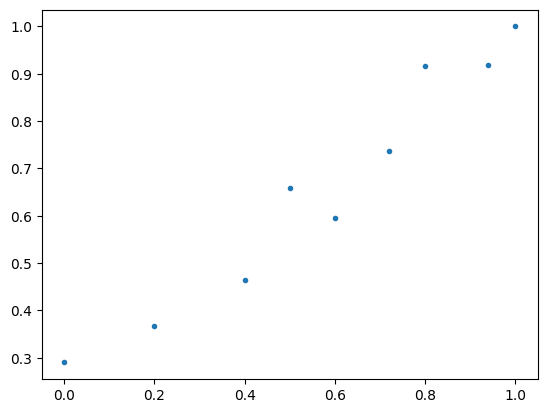

In [12]:
import matplotlib.pyplot as plt
plt.plot(X,y,'.')

#### a) Polynomiale Regression: Parameterbestimmung durch Aufstellen und Lösen der Normalgleichungen

Implementieren Sie eine Funktion namens **polyreg**, die die Parameter $\vec{\theta}=(\theta_0,\theta_1,\ldots,\theta_d)$ einer polynomialen Regression mit Hilfe eines Least-Squares-Ansatzes berechnet. Es soll also in Abhängigkeit vom Polynomgrad $d$ eine Modellfunktion der Form $f_{\vec{\theta}}(x)=\theta_0+\theta_1x+\theta_2x^2+\ldots+\theta_dx^d$ bestimmt werden. Stellen Sie dazu die Normalgleichungen auf (s. Vorlesung über Lineare Regression) und lösen Sie diese.

In [13]:
from numpy.linalg import solve

def polyreg(X, y, d):
    """
    calculates the coefficients of a polynomial regression function 
    
    Parameters:
        X (array): training examples for the input variable (1-dimensional array)
        y (array): output values corresponding to X (1-dimensional array)
        d (int): degree of the polynomial to be fit
        
    Returns:
        theta (array): coefficients of the regression function
    """
    
    matrix = np.ones((len(X), d))

    for i in range(1, (d)):
        feature_col = np.array(X)**i
        matrix[:,i] = feature_col
    
    theta = solve((matrix.T @ matrix), matrix.T @ y)
    
    return theta



#### b) Modellanwendung

Fitten Sie mit Hilfe der in a) implementierten Funktion ein Polynom 10. Grades an die gegebenen Daten. Zeichnen Sie das Polynom mit in die Grafik ein. Welche Beobachtung machen Sie?
<br><br>
Hinweis: mit der Funktion **numpy.polyval** kann man ein Polynom mit gegebenen Koeffizienten auswerten. Dazu muss ggf. die Reihenfolge des Parametervektors theta umgekehrt werden. Dies leistet die Funktion **numpy.flipud**

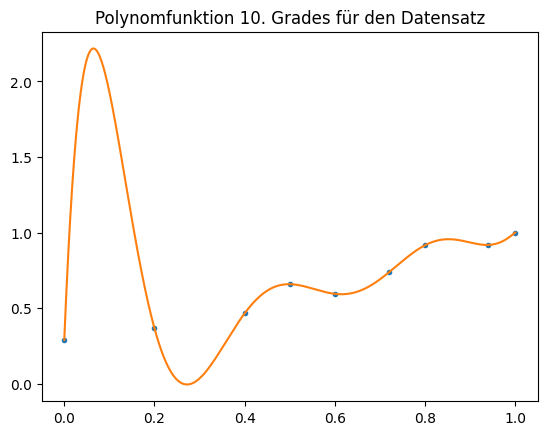

In [14]:
theta = polyreg(X, y, 10)

x_vals = np.linspace(0,1,10000)
y_vals = np.polyval(np.flipud(theta), x_vals)

plt.plot(X,y,'.', label='Datenpunkte')
plt.plot(x_vals, y_vals, '-', label='polynom')
plt.title("Polynomfunktion 10. Grades für den Datensatz")
plt.show()

#### c) Regularisierung

Erweitern Sie die in a) geschriebene Funktion, indem Sie Regularisierung "einbauen". Der Regularisierungsparameter L soll als zusätzliches Argument übergeben werden. Überlegen Sie sich zunächst, wie die Normalgleichungen für die regularisierte polynomiale Regression lauten. Testen Sie anschließend für L=0 und L=1000 die Funktion. Visualisieren Sie jeweils die resultierende Modellfunktion.

In [15]:
def polyreg_regulated(X, y, d, L):
    """
    calculates the coefficients of a polynomial regression function 
    
    Parameters:
        X (array): training examples for the input variable (1-dimensional array)
        y (array): output values corresponding to X (1-dimensional array)
        d (int): degree of the polynomial to be fit
        
    Returns:
        theta (array): coefficients of the regression function
    """
    matrix = np.ones((len(X), d))
    reg_term = 0

    #Polynomiale Regression aus der linreg Vorlesung
    for i in range(1, (d)):
        feature_col = np.array(X) ** i 
        matrix[:,i] = feature_col

    '''np.eye() erstellt eine Einheitsmatrix mit d Zeilen und d Spalten
    Dabei ist die Diagonale 1, der Rest 0. Wird diese Matrix mit L 
    Multipliziert, wird die Diagonale um L skaliert. So kann in der 
    1. Normalengleichung theta1 skaliert werden, in der 2. Gleichung
    theta2 usw.'''
    
    thetas = solve(((matrix.T@matrix) + (L*np.eye(d))), (matrix.T@y))
    
    return thetas



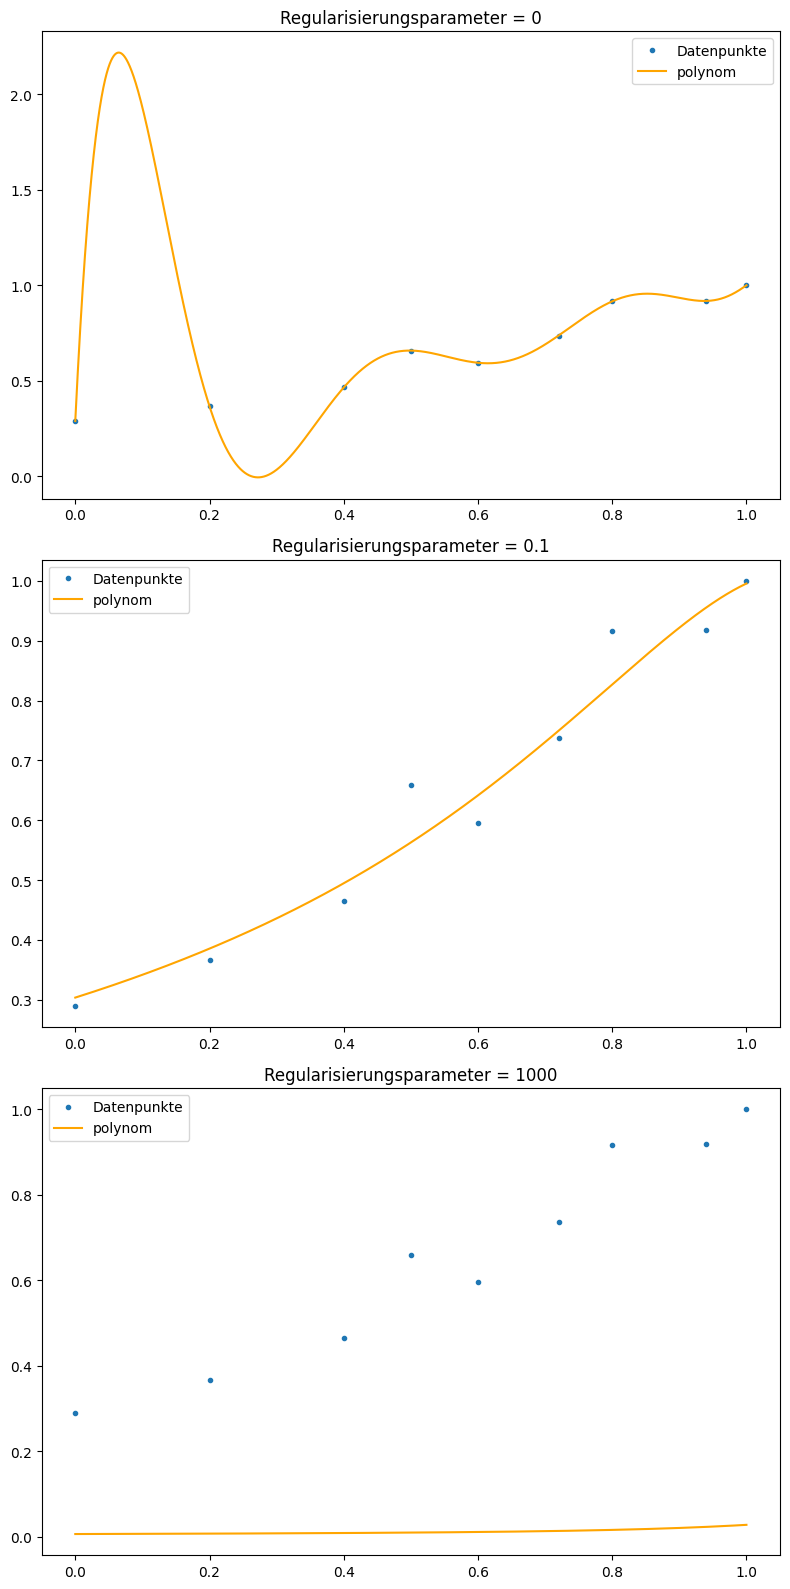

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 16))

theta = polyreg_regulated(X, y, 10, 0)
theta2 = polyreg_regulated(X, y, 10, 0.1)
theta3 = polyreg_regulated(X, y, 10, 1000)

x_vals = np.linspace(0,1,10000)
y_vals = np.polyval(np.flipud(theta), x_vals)
y_vals2 = np.polyval(np.flipud(theta2), x_vals)
y_vals3 = np.polyval(np.flipud(theta3), x_vals)

ax1.plot(X, y, '.',label='Datenpunkte')
ax1.plot(x_vals, y_vals, label='polynom', color='orange')
ax1.set_title('Regularisierungsparameter = 0')
ax1.legend()

ax2.plot(X, y, '.',label='Datenpunkte')
ax2.plot(x_vals, y_vals2, label='polynom', color='orange')
ax2.set_title('Regularisierungsparameter = 0.1')
ax2.legend()

ax3.plot(X, y, '.',label='Datenpunkte')
ax3.plot(x_vals, y_vals3, label='polynom', color='orange')
ax3.set_title('Regularisierungsparameter = 1000')
ax3.legend()

# Füge Platz zwischen den Subplots hinzu
plt.tight_layout()

# Zeige die Plots an
plt.show()

